In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

###Random Forest

In [40]:
df = pd.read_csv('/content/81-90.csv')

df['Citation_Ratio'] = df['cit_2022'] / df['cit_2021']

# Categorize the ratio
def categorize_ratio(ratio):
    if ratio < 1.05:
        return 'Low'
    elif 1.05 <= ratio <= 1.15:
        return 'Medium'
    else:
        return 'High'

df['Category'] = df['Citation_Ratio'].apply(categorize_ratio)

X = df[['cit_2017', 'cit_2018', 'cit_2019', 'cit_2020', 'cit_2021','cit_2022']]
y = df['Category']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       0.56      0.71      0.63         7
         Low       0.80      0.67      0.73        12
      Medium       0.00      0.00      0.00         1

    accuracy                           0.65        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.67      0.65      0.66        20



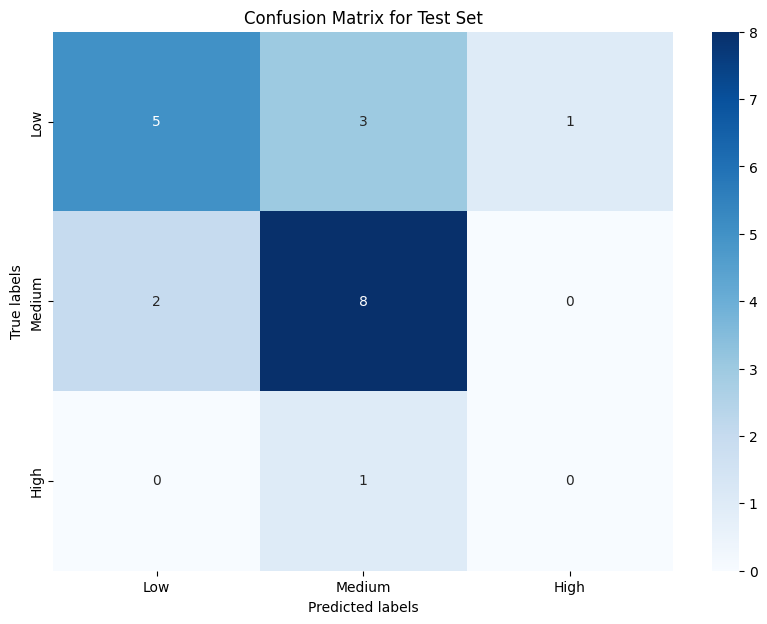

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()


In [42]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65


###Introducing 5 new features


In [43]:
for year in range(2017, 2022):
    df[f'feature_{year}'] = np.where(df[f'cit_{year}'] == 0, 0,
                                      (df[f'cit_{year+1}'] - df[f'cit_{year}']) / df[f'cit_{year}'])

# Determine the category based on the ratio for 2022/2021
df['category'] = pd.cut(df['feature_2021'], bins=[-np.inf, 1.05, 1.15, np.inf], labels=['Low', 'Medium', 'High'])

df[['feature_2017', 'feature_2018', 'feature_2019', 'feature_2020', 'feature_2021', 'category']]

,feature_2017,feature_2018,feature_2019,feature_2020,feature_2021,category
0,-0.082645,0.051051,-0.014286,-0.124638,-0.013245,Low
1,-0.258359,0.090164,0.364662,0.027548,-0.155496,Low
2,4.000000,1.400000,0.812500,0.908046,0.674699,Low
3,-0.063758,0.086022,-0.161716,0.102362,0.078571,Low
4,0.085526,-0.018182,-0.226852,-0.027944,-0.084189,Low
...,...,...,...,...,...,...
95,0.309059,-0.107191,-0.170973,-0.101742,-0.048980,Low
96,0.646018,-0.102151,-0.335329,0.189189,-0.257576,Low
97,0.000000,-0.142857,2.666667,1.181818,0.166667,Low
98,0.704225,0.049587,-0.129921,0.054299,0.167382,Low


In [44]:
X = df[['feature_2017', 'feature_2018', 'feature_2019', 'feature_2020', 'feature_2021']]
y = df['Category']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
print(y_pred)
# Evaluate the model
print(classification_report(y_test, y_pred))

['Low' 'Low' 'Low' 'High' 'High' 'Low' 'Low' 'Medium' 'High' 'Low' 'High'
 'Low' 'Low' 'Low' 'Low' 'Low' 'High' 'High' 'High' 'Low']
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
         Low       1.00      1.00      1.00        12
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
